# Forecasting epileptic seizures with generalized linear models (GLMs)
In this notebook, we will learn how to use GLMs to forecast epileptic seizures, using features extracted from the neural data

## Import libraries

In [94]:
library(tscount)
library(ggplot2)
options(repr.matrix.max.cols=20, repr.matrix.max.rows=30)

## Import features
We will use features from one single patient, "JE". <br>
Raw data have already been preprocessed, and features extracted. <br>
Features are stored as csv files in the 'data' folder, one csv file per patient. 

In [95]:
patient = "JE"
path.data = 'data/'

In [96]:
data = read.csv(paste0(path.data, 'features_day_', patient, '_acausal4.csv'))

In the csv file, we find one column per feature, with the header of the column giving the name of the feature. For instance, 'Seizures' correspond to the seizure time series, and 'IEA' to the IEA time series. We also have several circardian and multidien rhythms which have been extracted, we will us the first (shortest) multidien rhythm for this patient, here called 'MultidienCos1' and 'MultidienSin1'.

In [98]:
data

Time   Seizures IEA_1       IEA_2       CircadianAbs1 CircadianAngle1
1   733973 0        -0.68895713 -0.8243982  1.0622999      0.30265114    
2   733974 0        -0.39776513 -0.4811340  0.9251508      0.05223320    
3   733975 2        -0.04526954  0.7202905  0.6471955     -0.23002382    
4   733976 0         0.53711447  0.3198156  0.5512670      0.20976091    
5   733977 0        -0.48205755 -0.5383447  0.7674745      0.17018467    
6   733978 0        -0.58933882 -0.8053280  1.0346649      0.16318104    
7   733979 0        -0.67363124 -0.7862577  0.8933646      0.04228698    
8   733980 1        -0.78091250 -0.8243982  0.9101432      0.08970936    
9   733981 0        -0.78091250 -0.5002043  0.9011284      0.09006016    
10  733982 3         0.65205868 -0.1760104  0.7632132      0.00340874    
11  733983 2         0.09266351 -0.7481173  0.9828517     -0.21156469    
12  733984 1        -0.09124723 -0.2332210  1.0024380     -0.02444394    
13  733985 0         0.04668583 -0.2522913  0.8584810     -0.06362106    
14  733986 0         0.05434877 -0.5002043  0.8760923      0.07698770    
15  733987 0        -0.41309102 -0.8434684  0.9056678      0.21803405    
... ...    ...      ...         ...         ...           ...            
526 734498 0        -0.74996819 -0.77026943 0.9268360     -0.038174597   
527 734499 1        -0.04110681  0.07986385 1.3030120     -0.111264618   
528 734500 0        -0.33252760  0.52993441 1.1591067     -0.062258558   
529 734501 0        -0.45854740 -0.39521063 0.8572576     -0.289087404   
530 734502 0        -0.56093849 -0.34520279 0.8609735     -0.088140506   
531 734503 0        -0.64757710 -0.64524983 0.9197824      0.080727139   
532 734504 0        -0.49792859 -0.39521063 0.8404605      0.030272321   
533 734505 0        -0.34828007  0.15487561 0.9977551      0.007820335   
534 734506 0        -0.20650780 -0.07015967 0.7576423      0.104291118   
535 734507 0        -0.54518601 -0.49522631 0.9328235     -0.083219444   
536 734508 1        -0.12774542 -0.54523415 1.1154269      0.005429690   
537 734509 0        -0.57669096 -0.54523415 0.9831732     -0.108773375   
538 734510 0        -0.63970086 -0.67025375 0.9880989     -0.058658439   
539 734511 0        -0.66332958 -0.74526551 0.8396245     -0.020083615   
540 734512 0        -0.22226027 -0.39521063 0.5038072     -0.317026205   
    CircadianCos1 CircadianSin1 CircadianFiltSig1 CircadianAbs2 ...
1   0.9545497      0.298051893   0.119773405      0.74947508    ...
2   0.9986362      0.052209453  -0.035270086      0.83074088    ...
3   0.9736610     -0.228000719  -0.022063375      0.19243511    ...
4   0.9780807      0.208226058  -0.025371273      0.09896738    ...
5   0.9855535      0.169364350   0.040485449      0.42207160    ...
6   0.9867155      0.162457800   0.023368631      0.80713343    ...
7   0.9991060      0.042274374   0.048927622      0.93996314    ...
8   0.9959788      0.089589078   0.010880649      0.91269013    ...
9   0.9959473      0.089938470  -0.023478905      0.85522449    ...
10  0.9999942      0.003408733   0.116927346      0.80028739    ...
11  0.9777035     -0.209989957  -0.100066223      0.48831407    ...
12  0.9997013     -0.024441508  -0.056223894      1.09489339    ...
13  0.9979769     -0.063578151   0.004332281      1.37338356    ...
14  0.9970379      0.076911668  -0.009449024      1.34621233    ...
15  0.9763246      0.216310634   0.074335090      0.93390200    ...
... ...           ...           ...               ...              
526 0.9992714     -0.038165325  -0.01208475       0.6931958     ...
527 0.9938165     -0.111035188   0.02965731       0.7550011     ...
528 0.9980626     -0.062218346  -0.04690865       0.8886507     ...
529 0.9585044     -0.285077617  -0.06719337       0.6113123     ...
530 0.9961181     -0.088026427   0.01511822       0.8672593     ...
531 0.9967433      0.080639486   0.03258690       1.0201139     ...
532 0.9995418      0.030267697   0.04315088       0.8241033     ...
533 

## Select data of interest

We now select our features from the data dataframe, and put them in a matrix format.

In [64]:
t = as.matrix(data['Time'])
data.Sz = as.matrix(data['Seizures'])
data.IEA = as.matrix(data[ , grepl('IEA_1', names(data)), drop=FALSE])
cov.multi.IEA = as.matrix(data[ , grepl('MultidienCos1', names(data)) | grepl('MultidienSin1', names(data)), drop=FALSE])


Binarize seizure time series

In [65]:
threshold = 1  # for patients with low number of seizures
category.data.Sz = data.Sz
category.data.Sz[category.data.Sz<threshold] = 0
category.data.Sz[category.data.Sz>0] = 1
data.Sz = category.data.Sz

 ## Length of training, validation, and test set

To build the covariates based on the IEA and seizure histoy, we will need to remove a few data points at the beginning of the time series. The exact number of data points will depend on the length of the history. 
So, to ensure we evaluate algorithms on a test set which always has the same length and ease future comparisons, we systematically remove a few points at the beginning of the time series, whose length is given by the parameter IEA.eval.

In [66]:
eval.cut = 6

Here we set the length of the train and validation sets. The validation set is used for the parameter optimization, that we don't do here, but could be used further if needed

In [67]:
length.both = min(floor(0.60*length(data.Sz)), 48*8) - (eval.cut + 1)
length.train = floor(0.80*length.both) 
length.validation = length.both - length.train

## Forecasting seizures using  only seizure history
We first want to check if we can forecast seizures just by using seizure history, that is, seizures that happened before or on the day n, to forecast the likelihood of seizures on day n + 1. <br>
We first prepare the train and test sets by cutting the seizure time series into two chronological parts. The first part will serve for the training, the second part for the testing. 

In [68]:
t.cut = t[eval.cut:length(t)]
data.Sz.cut = data.Sz[eval.cut:length(data.Sz)]

In [69]:
train.t = t.cut[1:(length.train+length.validation)]
train.Sz = data.Sz.cut[1:(length.train+length.validation)]
test.t = t.cut[(length.train+length.validation+1):length(data.Sz.cut)]
test.Sz = data.Sz.cut[(length.train+length.validation+1):length(data.Sz.cut)]

We now choose how many days back in history we want to use in our GLM

In [70]:
history.Sz = 5

We now train our GLM. <br>
For this, we use the tsglm function of the tscount package. 
We will train the model using the train.Sz data, using observations based on all the five previous days.
Our GLM will use a log link function to avoid negative values for the output forecasts, and we fit a Poisson distribution.

In [87]:
Sz.with.IEA.fit = tsglm(train.Sz, 
                        model=list(past_obs=c(1:history.Sz)),
                        link="log", 
                        distr="poisson")

We now forecast using the test time series as input features, with the parameter n.ahead we take care of forecasting the next time point using previous history.

In [72]:
preds.test = predict(Sz.with.IEA.fit,
                     n.ahead=length((length.train+length.validation+1):length(data.Sz.cut)),
                     newobs=test.Sz, 
                     method="conddistr", 
                     level=0)

We build a dataframe with the results.

In [128]:
df = data.frame(Time=test.t, Seizures=test.Sz, Forecasts.seizures=preds.test$pred)

We now plot the results: the forecast probability as a black line, and the actual seizures as red dots. If out forecast is good, seizures would occur when the forecast probability is high.

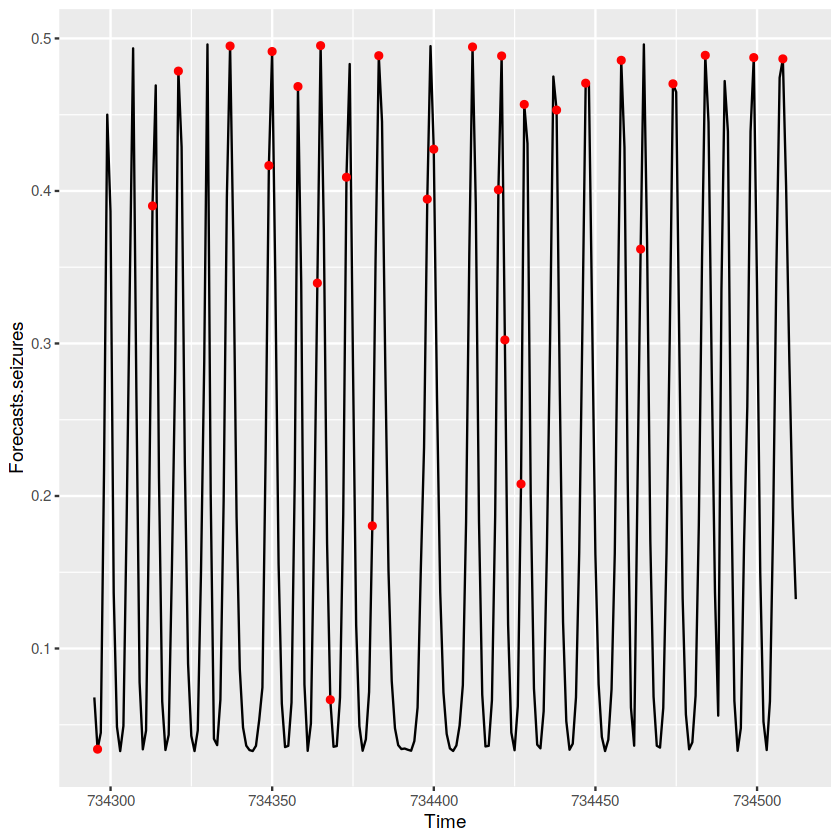

In [129]:
ggplot() + 
geom_line(data=df, mapping=aes(Time, Forecasts.seizures)) +  
geom_point(data=df[df$Seizures %in% 1,], mapping=aes(x=Time, y=Forecasts.seizures), color='red') 

As you can see, for this patient,the forecast based on the last 5 days of seizure history is not very good. Could we improve this forecast if we use instead the IEA history?

## Forecasting seizures using IEA history

We now tryforecast seizures just by using IEA history, that is, IEA that happened before or on the day n, to forecast the likelihood of seizures on day n + 1. To build the history, we need to set a list of the IEA.

In [75]:
history.IEA.list = c(1:5)

We then build a matrix, where we duplicate the IEA, but with each column shifted by the number of days indicated in history.IEA.list

In [76]:
cov.IEA = data.IEA[1:(dim(data.IEA)[1]-1),,drop=FALSE]
for (ilag in c(2:length(history.IEA.list))){
    cov.IEA = cbind(cov.IEA[(1+history.IEA.list[ilag]-history.IEA.list[ilag-1]):dim(cov.IEA)[1],],
                    data.IEA[1:(dim(data.IEA)[1]-history.IEA.list[ilag]),])
    }

Let's have a look at the IEA covariate delayed matrix we obtained

In [100]:
cov.IEA

[,1]        [,2]        [,3]        [,4]        [,5]       
 [1,] -0.48205755  0.53711447 -0.04526954 -0.39776513 -0.68895713
 [2,] -0.58933882 -0.48205755  0.53711447 -0.04526954 -0.39776513
 [3,] -0.67363124 -0.58933882 -0.48205755  0.53711447 -0.04526954
 [4,] -0.78091250 -0.67363124 -0.58933882 -0.48205755  0.53711447
 [5,] -0.78091250 -0.78091250 -0.67363124 -0.58933882 -0.48205755
 [6,]  0.65205868 -0.78091250 -0.78091250 -0.67363124 -0.58933882
 [7,]  0.09266351  0.65205868 -0.78091250 -0.78091250 -0.67363124
 [8,] -0.09124723  0.09266351  0.65205868 -0.78091250 -0.78091250
 [9,]  0.04668583 -0.09124723  0.09266351  0.65205868 -0.78091250
[10,]  0.05434877  0.04668583 -0.09124723  0.09266351  0.65205868
[11,] -0.41309102  0.05434877  0.04668583 -0.09124723  0.09266351
[12,] -0.41309102 -0.41309102  0.05434877  0.04668583 -0.09124723
[13,] -0.63531650 -0.41309102 -0.41309102  0.05434877  0.04668583
[14,] -0.60466471 -0.63531650 -0.41309102 -0.41309102  0.05434877
[15,] -0.74259777 -0.60466471 -0.63531650 -0.41309102 -0.41309102
[16,] ...         ...         ...         ...         ...        
[17,] -0.64757710 -0.67120581 -0.67908205 -0.66332958 -0.71058700
[18,] -0.74996819 -0.64757710 -0.67120581 -0.67908205 -0.66332958
[19,] -0.04110681 -0.74996819 -0.64757710 -0.67120581 -0.67908205
[20,] -0.33252760 -0.04110681 -0.74996819 -0.64757710 -0.67120581
[21,] -0.45854740 -0.33252760 -0.04110681 -0.74996819 -0.64757710
[22,] -0.56093849 -0.45854740 -0.33252760 -0.04110681 -0.74996819
[23,] -0.64757710 -0.56093849 -0.45854740 -0.33252760 -0.04110681
[24,] -0.49792859 -0.64757710 -0.56093849 -0.45854740 -0.33252760
[25,] -0.34828007 -0.49792859 -0.64757710 -0.56093849 -0.45854740
[26,] -0.20650780 -0.34828007 -0.49792859 -0.64757710 -0.56093849
[27,] -0.54518601 -0.20650780 -0.34828007 -0.49792859 -0.64757710
[28,] -0.12774542 -0.54518601 -0.20650780 -0.34828007 -0.49792859
[29,] -0.57669096 -0.12774542 -0.54518601 -0.20650780 -0.34828007
[30,] -0.63970086 -0.57669096 -0.12774542 -0.54518601 -0.20650780
[31,] -0.66332958 -0.63970086 -0.57669096 -0.12774542 -0.54518601

We cut the first time points of the IEA delayed matrix, so that it matches to the previous section with seizure history

In [101]:
cov.IEA.cut = cov.IEA[(eval.cut-length(history.IEA.list)):(length(data.Sz)-length(history.IEA.list)),,drop=FALSE]

We now prepare train and test sets with these IEA delayed matrices.

In [102]:
train.cov.IEA = cov.IEA.cut[1:(length.train+length.validation),, drop=FALSE]
test.cov.IEA = cov.IEA.cut[(length.train+length.validation+1):length(data.Sz.cut),, drop=FALSE]

We now train our GLM. 
This time, we only use the IEA delayed matrix as covariate, rather than building a model with history.
Our GLM will use, as above, a log link function to avoid negative values for the output forecasts, and we fit a Poisson distribution.

In [133]:
Sz.with.IEA.fit = tsglm(train.Sz, 
                        xreg=train.cov.IEA, 
                        link="log", 
                        distr="poisson")

We now forecast using the test IEA delayed matrix as covariate, with the parameter n.ahead we take care of forecasting the next time point using previous history.

In [134]:
preds.test = predict(Sz.with.IEA.fit, 
                     n.ahead=length((length.train+length.validation+1):length(data.Sz.cut)),
                     newxreg=test.cov.IEA, level=0)

We add a colum to the dataframe with the results

In [135]:
df['Forecasts.IEA'] = preds.test$pred

We now plot the results: the forecast probability as a black line, and the actual seizures as red dots. If out forecast is good, seizures would occur when the forecast probability is high.

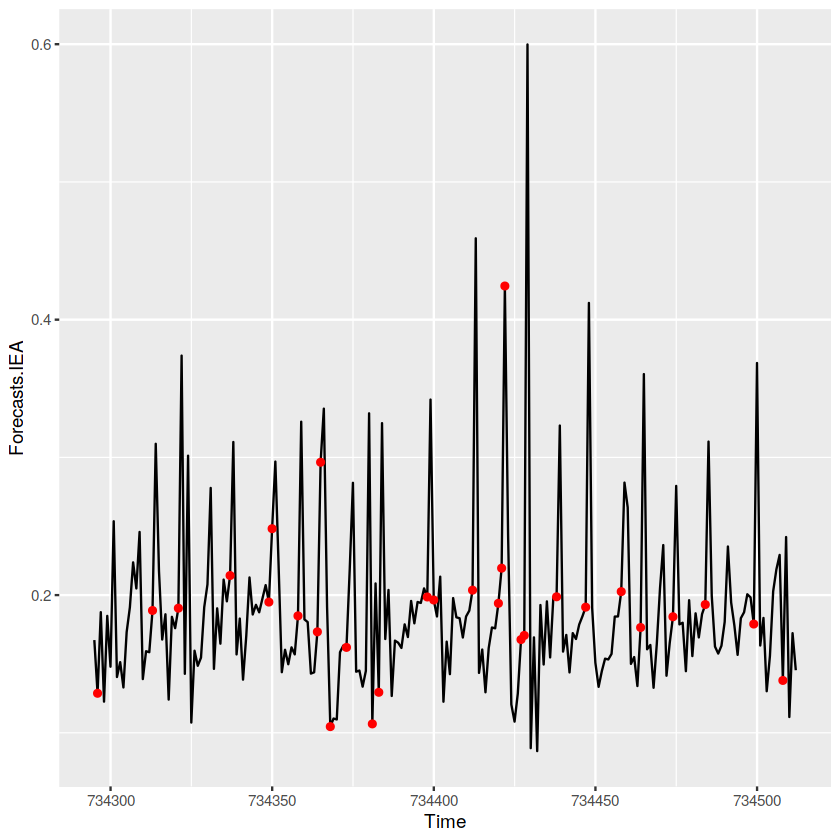

In [136]:
ggplot() + 
geom_line(data=df, mapping=aes(Time, Forecasts.IEA)) +  
geom_point(data=df[df$Seizures %in% 1,], mapping=aes(x=Time, y=Forecasts.IEA), color='red') 

The resulting forecasts look a bit more realistic than before, but still not particularly good.

## Forecasting seizures using multidien rhythms


 We now will forcast using the first multidien rhythm. For the multidien covariate, we first shift the time series forward and repeat the first time point to ensure causality of the forecats.

In [120]:
cov.multi.IEA = rbind(cov.multi.IEA[1,,drop=FALSE], cov.multi.IEA[1:(nrow(cov.multi.IEA) - 1),,drop=FALSE])

We cut the first time points of the multidien covariate, so that it matches to the previous sections with seizure and IEA history

In [122]:
cov.multi.IEA.cut = cov.multi.IEA[eval.cut:length(data.Sz),,drop=FALSE]
cov.multi.train.IEA = cov.multi.IEA.cut[1:(length.train+length.validation),,drop=FALSE]
cov.multi.test.IEA = cov.multi.IEA.cut[(length.train+length.validation+1):length(data.Sz.cut),,drop=FALSE]

We now train our GLM. 
Once again, we only use the multidien covariate, rather than building a model with history.
Our GLM will use, as above, a log link function to avoid negative values for the output forecasts, and we fit a Poisson distribution.

In [139]:
Sz.with.IEA.fit = tsglm(train.Sz, xreg=cov.multi.train.IEA, link="log", distr="poisson")

We now forecast using the test multidien covariate, with the parameter n.ahead we take care of forecasting the next time point using previous history.

In [140]:
preds.test = predict(Sz.with.IEA.fit, 
                     n.ahead=length((length.train+length.validation+1):length(data.Sz.cut)), 
                     newxreg=cov.multi.test.IEA, 
                     level=0)

We add a colum to the dataframe with the results

In [141]:
df['Forecasts.multidien'] = preds.test$pred

We now plot the results: the forecast probability as a black line, and the actual seizures as red dots. If out forecast is good, seizures would occur when the forecast probability is high.

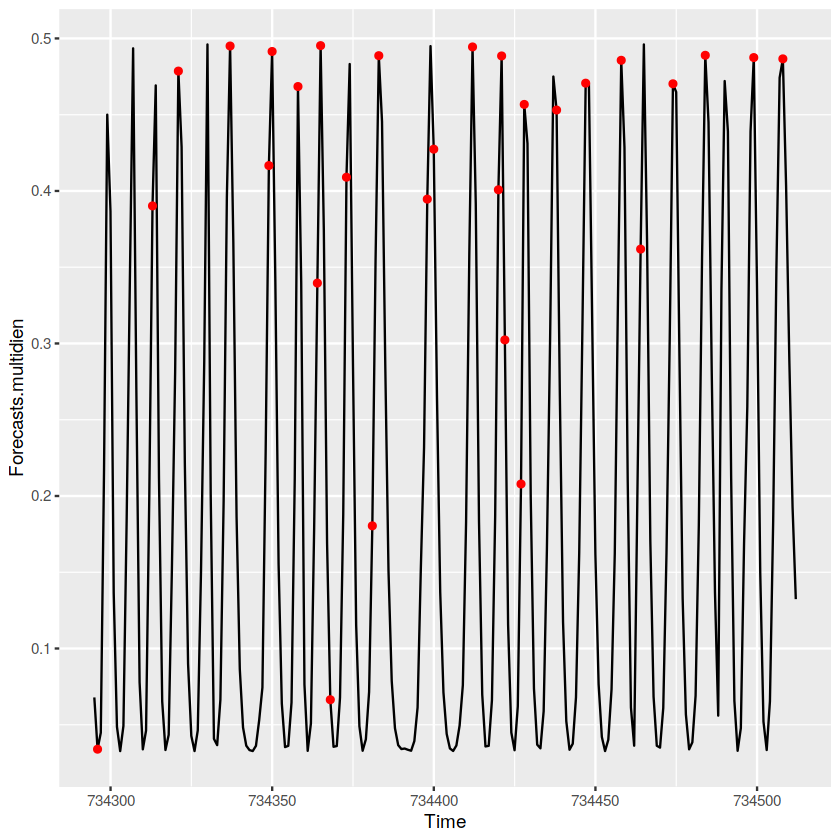

In [143]:
ggplot() + 
geom_line(data=df, mapping=aes(Time, Forecasts.multidien)) +  
geom_point(data=df[df$Seizures %in% 1,], mapping=aes(x=Time, y=Forecasts.multidien), color='red') 

This time, the forecasting results are pretty good, as the seizures (red dots) correspond well to the peak probabilities.